Corners found: True


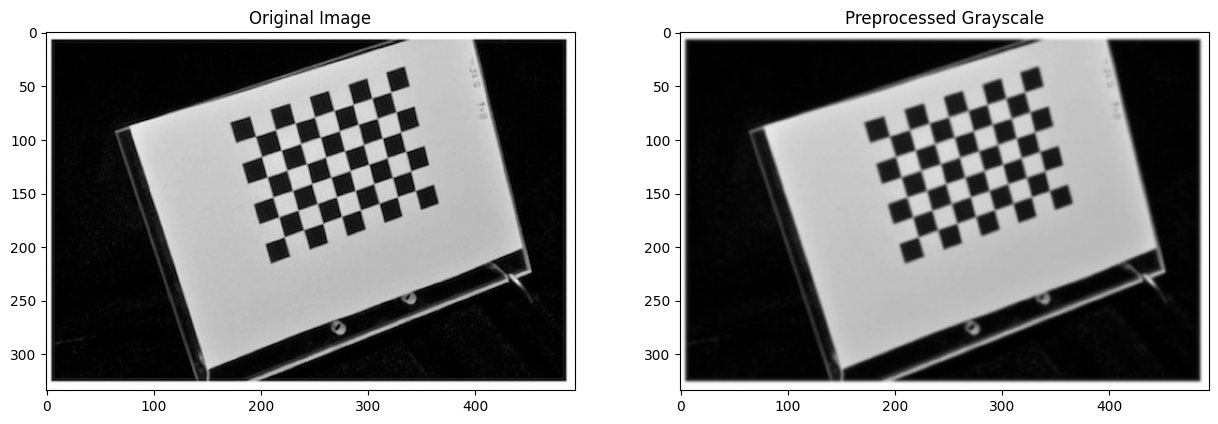

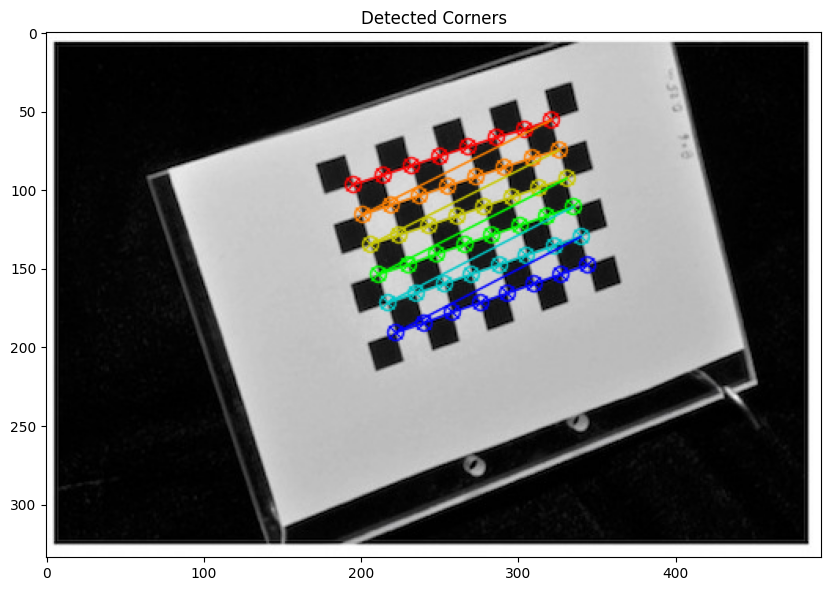

In [8]:
import cv2
import matplotlib.pyplot as plt

# Read and check image
img = cv2.imread('/home/veit/Downloads/calibration_test.jpg')
if img is None:
    raise ValueError("Error: Could not load image")

# Convert to grayscale and preprocess
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray = cv2.GaussianBlur(gray, (5,5), 0)

# Attempt to find corners with more robust parameters
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)
ret, corners = cv2.findChessboardCorners(gray, (8, 6), 
    flags=cv2.CALIB_CB_ADAPTIVE_THRESH + 
          cv2.CALIB_CB_NORMALIZE_IMAGE + 
          cv2.CALIB_CB_FAST_CHECK)

print(f'Corners found: {ret}')

# Display both original and processed images for debugging
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Original Image')

plt.subplot(122)
plt.imshow(gray, cmap='gray')
plt.title('Preprocessed Grayscale')
plt.show()

if ret:
    # If corners are found, refine them and draw
    corners = cv2.cornerSubPix(gray, corners, (11,11), (-1,-1), criteria)
    img_corners = cv2.drawChessboardCorners(img.copy(), (8, 6), corners, ret)
    plt.figure(figsize=(10,10))
    plt.imshow(cv2.cvtColor(img_corners, cv2.COLOR_BGR2RGB))
    plt.title('Detected Corners')
    plt.show()
